**Install the required library.**

In [1]:
!pip install python_speech_features

**Load the required libraries.**

In [2]:
import python_speech_features as mfcc
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle
from collections import Counter
gender_recognition_path = os.getcwd() + "/Gender_Recognition"
speaker_recognition_path = os.getcwd() + "/Speaker_Recognition"
gender_recognition_train_path = gender_recognition_path + "/Train"
gender_recognition_test_path = gender_recognition_path + "/Test"

gender_recognition_valid_path = gender_recognition_path + "/Valid"
speaker_recognition_train_path = speaker_recognition_path + "/Train"

speaker_recognition_test_path = speaker_recognition_path + "/Test"
speaker_recognition_valid_path = speaker_recognition_path + "/Valid"

train_speaker_thetas_path = os.getcwd() + "/train_speaker_thetas.data"
train_gender_thetas_path = os.getcwd() + "/train_gender_thetas.data"

train_X_gender_path = os.getcwd() + "/train_X_gender.data"
train_X_speaker_path = os.getcwd() + "/train_X_speaker.data"

train_Y_gender_path = os.getcwd() + "/train_Y_gender.data"
train_Y_speaker_path = os.getcwd() + "/train_Y_speaker.data"


X_val_gender_path = os.getcwd() + "/X_val_gender.data"
X_val_speaker_path = os.getcwd() + "/X_val_speaker.data"

Y_val_gender_path = os.getcwd() + "/Y_val_gender.data"
Y_val_speaker_path = os.getcwd() + "/Y_val_speaker.data"

test_X_gender_path = os.getcwd() + "/test_X_gender.data"
test_X_speaker_path = os.getcwd() + "/test_X_speaker.data"

train_speaker_labels_path  = os.getcwd() + "/train_speaker_labels.data"
train_gender_labels_path  = os.getcwd() + "/train_gender_labels.data"

test_speaker_labels_path =  os.getcwd() + "/test_speaker_labels.data"
test_gender_labels_path  = os.getcwd() + "/test_gender_labels.data"

train_speaker_counter_list_labels_path  = os.getcwd() + "/train_speaker_counter_list_labels.data"
train_gender_counter_list_labels_path  = os.getcwd() + "/train_gender_counter_list_labels.data"

test_speaker_counter_list_labels_path  = os.getcwd() + "/test_speaker_counter_list_labels.data"
test_gender_counter_list_labels_path  = os.getcwd() + "/test_gender_counter_list_labels.data"

val_speaker_counter_list_labels_path = os.getcwd() + "/val_speaker_counter_list_labels.data"
val_gender_counter_list_labels_path = os.getcwd() + "/val_gender_counter_list_labels.data"

In [3]:
def create_labels_vector(Y,dataset_type,Y_val=None,val_dataset_type =None):
  num_val = None
  ytrue = []
  if Y_val is not None:
    num_val = len(Y_val)
  
  for i,y in enumerate(Y):
    index = encoding_index(y,dataset_type)
    if num_val is not None:
      if i < num_val:
        index_val = encoding_index(Y_val[i],val_dataset_type)
    one_hot_vector = []
    one_hot_vector_val = []
    if dataset_type == "train_speaker":
      one_hot_vector = create_one_hot_encoding_vector(train_speaker_counter_list_labels)
      if num_val is not None:
        if i < num_val:
          one_hot_vector_val = create_one_hot_encoding_vector(val_speaker_counter_list_labels )
    if dataset_type == "train_gender":
      one_hot_vector = create_one_hot_encoding_vector(train_gender_counter_list_labels)
      if num_val is not None:
        if i < num_val:
          one_hot_vector_val = create_one_hot_encoding_vector(val_gender_counter_list_labels )
    if dataset_type == "test_speaker":
      one_hot_vector = create_one_hot_encoding_vector(test_speaker_counter_list_labels)
      if num_val is not None:
        if i < num_val:
          one_hot_vector_val = create_one_hot_encoding_vector(val_speaker_counter_list_labels )
    if dataset_type == "test_gender":
      one_hot_vector = create_one_hot_encoding_vector(test_gender_counter_list_labels)
      if num_val is not None:
        if i < num_val:
          one_hot_vector_val = create_one_hot_encoding_vector(val_gender_counter_list_labels )
    one_hot_vector[index] = 1
    if num_val is not None:
      if i < num_val:
        one_hot_vector_val[index_val] = 1
        yval.append(one_hot_vector_val)
    ytrue.append(one_hot_vector)
  Y = np.array(ytrue)
  return Y



In [4]:
def save_pickled_data(data,path):
    with open(path,'wb' ,) as f:
        pickle.dump(data,f)
    print("pickled data saved as pickle dump at",path)
def load_pickled_data(path):
    with open(path,'rb' ,) as f:
        data = pickle.load(f)
    # print("pickled data loaded as pickle dump from",path)
    return data
def create_labels_counter_list(labels):
  c = list(set(labels))
  return c


def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

def read_audio_files(dir_path,dataset_type):
  audio_folders = [x[0] for x in os.walk(dir_path)]
  all_audio_files = []
  i = 0
  labels = []
  id = ""
  for folder in audio_folders:
    if i > 0:
      audio_filenames = glob.glob(folder + "/*.*")
      if dataset_type == "speaker":
        id = folder.split("/")[-1]
        id = id.split("_")[0]
      if dataset_type == "gender":
        id = folder.split("/")[-1]
        id = id.split("_")[-1]

      
      for filename in audio_filenames:
        sr,audio = read(filename)
        all_audio_files.append([sr,audio])
        labels.append(id)
    i = i + 1
  return all_audio_files,labels
def feature_extraction(audio_files):
  all_features = []
  for i in range(len(audio_files)):
    audio = audio_files[i][1]
    sr = audio_files[i][0]
    features = get_MFCC(audio,sr)
    features = np.insert(features,0,1)
    all_features.append(features)
  return all_features
def load_processed_data(data_path,dataset_type):
  audio_files,labels = read_audio_files(data_path,dataset_type)
  audio_features = feature_extraction(audio_files)
  return audio_features,labels


In [6]:
train_X_speaker,speaker_labels = load_processed_data(speaker_recognition_train_path,"speaker")
train_X_gender,gender_labels = load_processed_data(gender_recognition_train_path,"gender")

test_X_speaker,test_speaker_labels = load_processed_data(speaker_recognition_test_path,"speaker")
test_X_gender,test_gender_labels = load_processed_data(gender_recognition_test_path,"gender")

X_val_gender,val_gender_labels = load_processed_data(gender_recognition_valid_path,"gender")
X_val_speaker,val_speaker_labels = load_processed_data(speaker_recognition_valid_path,"speaker")

train_speaker_counter_list_labels = create_labels_counter_list(speaker_labels)
train_gender_counter_list_labels = create_labels_counter_list(gender_labels)

test_speaker_counter_list_labels = create_labels_counter_list(test_speaker_labels)
test_gender_counter_list_labels = create_labels_counter_list(test_gender_labels)

val_speaker_counter_list_labels = create_labels_counter_list(val_speaker_labels)
val_gender_counter_list_labels = create_labels_counter_list(val_gender_labels)

save_pickled_data(train_X_speaker,train_X_speaker_path)
save_pickled_data(train_X_gender,train_X_gender_path)

save_pickled_data(X_val_speaker,X_val_speaker_path)
save_pickled_data(X_val_gender,X_val_gender_path)

save_pickled_data(val_speaker_labels,Y_val_speaker_path)
save_pickled_data(val_gender_labels,Y_val_gender_path)

save_pickled_data(train_speaker_counter_list_labels,train_speaker_counter_list_labels_path )
save_pickled_data(train_gender_counter_list_labels,train_gender_counter_list_labels_path )

save_pickled_data(test_gender_counter_list_labels,test_gender_counter_list_labels_path )
save_pickled_data(test_speaker_counter_list_labels,test_speaker_counter_list_labels_path )


save_pickled_data(val_speaker_counter_list_labels,val_speaker_counter_list_labels_path )
save_pickled_data(val_gender_counter_list_labels,val_gender_counter_list_labels_path )

pickled data saved as pickle dump at /content/train_X_speaker.data
pickled data saved as pickle dump at /content/train_X_gender.data
pickled data saved as pickle dump at /content/X_val_speaker.data
pickled data saved as pickle dump at /content/X_val_gender.data
pickled data saved as pickle dump at /content/Y_val_speaker.data
pickled data saved as pickle dump at /content/Y_val_gender.data
pickled data saved as pickle dump at /content/train_speaker_counter_list_labels.data
pickled data saved as pickle dump at /content/train_gender_counter_list_labels.data
pickled data saved as pickle dump at /content/test_gender_counter_list_labels.data
pickled data saved as pickle dump at /content/test_speaker_counter_list_labels.data
pickled data saved as pickle dump at /content/val_speaker_counter_list_labels.data
pickled data saved as pickle dump at /content/val_gender_counter_list_labels.data


In [19]:
save_pickled_data(speaker_labels,train_speaker_labels_path)
save_pickled_data(gender_labels,train_gender_labels_path)
train_speaker_counter_list_labels = load_pickled_data(train_speaker_counter_list_labels_path )
train_gender_counter_list_labels = load_pickled_data(train_gender_counter_list_labels_path )
test_speaker_counter_list_labels = load_pickled_data(test_speaker_counter_list_labels_path )
test_gender_counter_list_labels = load_pickled_data(test_gender_counter_list_labels_path )

val_speaker_counter_list_labels = load_pickled_data(val_speaker_counter_list_labels_path )
val_gender_counter_list_labels =  load_pickled_data(val_gender_counter_list_labels_path )
Y_val_speaker = load_pickled_data(Y_val_speaker_path)
Y_val_gender = load_pickled_data(Y_val_gender_path)
test_Y_gender = create_labels_vector(test_gender_labels,dataset_type="test_gender")
test_Y_speaker = create_labels_vector(test_speaker_labels,dataset_type="test_speaker")
save_pickled_data(test_Y_speaker,test_X_speaker_path)
save_pickled_data(test_Y_gender,test_X_gender_path)

pickled data saved as pickle dump at /content/train_speaker_labels.data
pickled data saved as pickle dump at /content/train_gender_labels.data
pickled data saved as pickle dump at /content/test_X_speaker.data
pickled data saved as pickle dump at /content/test_X_gender.data


In [8]:
def save_pickled_data(data,path):
    with open(path,'wb' ,) as f:
        pickle.dump(data,f)
    print("pickled data saved as pickle dump at",path)
def load_pickled_data(path):
    with open(path,'rb' ,) as f:
        data = pickle.load(f)
    # print("pickled data loaded as pickle dump from",path)
    return data
def create_labels_counter_list(labels):
  c = list(set(labels))
  return c


def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

def read_audio_files(dir_path,dataset_type):
  audio_folders = [x[0] for x in os.walk(dir_path)]
  all_audio_files = []
  i = 0
  labels = []
  id = ""
  for folder in audio_folders:
    if i > 0:
      audio_filenames = glob.glob(folder + "/*.*")
      if dataset_type == "speaker":
        id = folder.split("/")[-1]
        id = id.split("_")[0]
      if dataset_type == "gender":
        id = folder.split("/")[-1]
        id = id.split("_")[-1]

      
      for filename in audio_filenames:
        sr,audio = read(filename)
        all_audio_files.append([sr,audio])
        labels.append(id)
    i = i + 1
  return all_audio_files,labels
def feature_extraction(audio_files):
  all_features = []
  for i in range(len(audio_files)):
    audio = audio_files[i][1]
    sr = audio_files[i][0]
    features = get_MFCC(audio,sr)
    features = np.insert(features,0,1)
    all_features.append(features)
  return all_features
def load_processed_data(data_path,dataset_type):
  audio_files,labels = read_audio_files(data_path,dataset_type)
  audio_features = feature_extraction(audio_files)
  return audio_features,labels


In [18]:
train_X_speaker,speaker_labels = load_processed_data(speaker_recognition_train_path,"speaker")
train_X_gender,gender_labels = load_processed_data(gender_recognition_train_path,"gender")
X_val_gender,val_gender_labels = load_processed_data(gender_recognition_valid_path,"gender")
X_val_speaker,val_speaker_labels = load_processed_data(speaker_recognition_valid_path,"speaker") 
train_speaker_counter_list_labels = create_labels_counter_list(speaker_labels)
train_gender_counter_list_labels = create_labels_counter_list(gender_labels)
val_speaker_counter_list_labels = create_labels_counter_list(val_speaker_labels)
val_gender_counter_list_labels = create_labels_counter_list(val_gender_labels)
save_pickled_data(train_X_speaker,train_X_speaker_path)
save_pickled_data(train_X_gender,train_X_gender_path)
save_pickled_data(X_val_speaker,X_val_speaker_path)
save_pickled_data(X_val_gender,X_val_gender_path)
save_pickled_data(val_speaker_labels,Y_val_speaker_path)
save_pickled_data(val_gender_labels,Y_val_gender_path)
save_pickled_data(train_speaker_counter_list_labels,train_speaker_counter_list_labels_path )
save_pickled_data(train_gender_counter_list_labels,train_gender_counter_list_labels_path )
save_pickled_data(val_speaker_counter_list_labels,val_speaker_counter_list_labels_path )
save_pickled_data(val_gender_counter_list_labels,val_gender_counter_list_labels_path )

KeyboardInterrupt: ignored

In [10]:
save_pickled_data(speaker_labels,train_speaker_labels_path)
save_pickled_data(gender_labels,train_gender_labels_path)
train_speaker_counter_list_labels = load_pickled_data(train_speaker_counter_list_labels_path )
train_gender_counter_list_labels = load_pickled_data(train_gender_counter_list_labels_path )
val_speaker_counter_list_labels = load_pickled_data(val_speaker_counter_list_labels_path )
val_gender_counter_list_labels =  load_pickled_data(val_gender_counter_list_labels_path )
Y_val_speaker = load_pickled_data(Y_val_speaker_path)
Y_val_gender = load_pickled_data(Y_val_gender_path)
print(Y_val_speaker)

pickled data saved as pickle dump at /content/train_speaker_labels.data
pickled data saved as pickle dump at /content/train_gender_labels.data
['SPK054', 'SPK054', 'SPK103', 'SPK103', 'SPK033', 'SPK033', 'SPK135', 'SPK135', 'SPK030', 'SPK030', 'SPK042', 'SPK042', 'SPK136', 'SPK136', 'SPK031', 'SPK031', 'SPK029', 'SPK029', 'SPK012', 'SPK012', 'SPK099', 'SPK099', 'SPK128', 'SPK128', 'SPK111', 'SPK111', 'SPK016', 'SPK016', 'SPK139', 'SPK139', 'SPK077', 'SPK077', 'SPK017', 'SPK017', 'SPK003', 'SPK003', 'SPK020', 'SPK020', 'SPK134', 'SPK134', 'SPK072', 'SPK072', 'SPK026', 'SPK026', 'SPK115', 'SPK115', 'SPK011', 'SPK011', 'SPK055', 'SPK055', 'SPK015', 'SPK015', 'SPK074', 'SPK074', 'SPK075', 'SPK075', 'SPK005', 'SPK005', 'SPK002', 'SPK002', 'SPK140', 'SPK140', 'SPK125', 'SPK125', 'SPK047', 'SPK047', 'SPK096', 'SPK096', 'SPK071', 'SPK071', 'SPK008', 'SPK008', 'SPK141', 'SPK141', 'SPK129', 'SPK129', 'SPK092', 'SPK092', 'SPK127', 'SPK127', 'SPK024', 'SPK024', 'SPK087', 'SPK087', 'SPK067', 'SPK06

In [12]:

def execute_cross_validation(X,Y,thetas,epochs,alpha):
  X = np.array(X)
  Y = np.array(Y)
  ce = []
  costs = []
  
    
  for epoch in range(epochs):
    thetas=gradientDescent(X,Y,thetas,alpha)
    hx = h(X,thetas)  
    for i,y in enumerate(Y):
      l = cross_entropy(y,hx[i])
      ce.append(l)
    L = np.array(ce)
    m = L.shape[0]
    cost = computeCost(L,m)
    costs.append(cost)
  return costs

def create_one_hot_encoding_vector(raw_labels):
  one_hot_encoding = np.zeros(len(raw_labels))
  return one_hot_encoding
def encoding_index(label,label_type):
  labels = []
  if label_type == "train_speaker":
    labels  = load_pickled_data(train_speaker_counter_list_labels_path)
  if label_type == "train_gender":
    labels  = load_pickled_data(train_gender_counter_list_labels_path)
  if label_type == "val_speaker":
    labels  = load_pickled_data(val_speaker_counter_list_labels_path)
  if label_type == "val_gender":
    labels  = load_pickled_data(val_gender_counter_list_labels_path)
  if label_type == "test_speaker":
    labels  = load_pickled_data(test_speaker_counter_list_labels_path)
  if label_type == "test_gender":
    labels  = load_pickled_data(test_gender_counter_list_labels_path)
  index = labels.index(label)
  return index
def create_thetas(num_of_feature,num_of_classes):
  thetas = np.zeros((num_of_feature,num_of_classes))
  # thetas = np.random.normal(size=(num_of_feature*num_of_classes)).reshape((num_of_feature,num_of_classes))
 
  return thetas

def softmax(z):
  exp_z = np.exp(z)
  sum_exp_z = np.sum(exp_z)
  s = exp_z/sum_exp_z
  return s
def cross_entropy(y,hx): 
  l = y*np.log(hx)
  l = -np.sum(l)
  return l

def h(X,thetas):
    hx = np.dot(X,thetas)
    t = []
    for x in hx:
      s = softmax(x)
      t.append(s) 
    return t
def computeCost(L,m):
  cost = np.sum(L)
  cost = cost / m
  return cost

def gradientDescent(X,Y,thetas,alpha):
  updates=np.zeros(thetas.shape)
  preds=h(X,thetas)
  feats=X.shape[1]
  for s,sample in enumerate(X):
    difference=Y[s]-preds[s]
    for i,feat in enumerate(sample):
      for j,diff in enumerate(difference):
        updates[i][j]=updates[i][j]-(diff*feat)
  updates=updates/X.shape[0]
  thetas=thetas-alpha*updates
  return thetas




def mnm_logistic_regression_train(X,Y,epochs =None,alphas=None,dataset_type=None):
  import datetime
  print("starting training")
  start_time = datetime.datetime.now()
  num_classes = len(list(set(Y)))
  num_features = X.shape[1]
  X_val = None
  Y_val = None
  if dataset_type == "train_speaker":
    X_val = load_pickled_data(X_val_speaker_path)
    Y_val = load_pickled_data(Y_val_speaker_path)
    val_dataset_type = "val_speaker"
    print("valsp loaded")
  if dataset_type == "train_gender":
    X_val = load_pickled_data(X_val_gender_path)
    Y_val = load_pickled_data(Y_val_gender_path)
    val_dataset_type = "val_gender"
    print("valgen loaded")
  thetas = create_thetas(num_features,num_classes)
  hx = h(X,thetas)  
  ytrue = []
  yval = []
  num_val = len(Y_val)
  print("creating one hot encodings")
  for i,y in enumerate(Y):
    index = encoding_index(y,dataset_type)
    if i < num_val:
      index_val = encoding_index(Y_val[i],val_dataset_type)
    one_hot_vector = []
    one_hot_vector_val = []
    if dataset_type == "train_speaker":
      one_hot_vector = create_one_hot_encoding_vector(train_speaker_counter_list_labels)
      if i < num_val:
        one_hot_vector_val = create_one_hot_encoding_vector(val_speaker_counter_list_labels )
    if dataset_type == "train_gender":
      one_hot_vector = create_one_hot_encoding_vector(train_gender_counter_list_labels)
      if i < num_val:
        one_hot_vector_val = create_one_hot_encoding_vector(val_gender_counter_list_labels )
    one_hot_vector[index] = 1
    if i < num_val:
      one_hot_vector_val[index_val] = 1
      yval.append(one_hot_vector_val)
    ytrue.append(one_hot_vector)
  Y = np.array(ytrue)
  if dataset_type == "train_gender":
    save_pickled_data(Y,train_Y_gender_path)
  if dataset_type == "train_speaker":
    save_pickled_data(Y,train_Y_speaker_path)
  Y_val = np.array(yval)
  print("created one hot encodings")
  ce = []
  i = 0
  train_costs = []
  print("executing cross validation")
  val_costs = execute_cross_validation(X_val,Y_val,thetas,epochs,alphas)
  best_alpha=alphas
  print("best alpha is",best_alpha)
  print("executing cross validation")
  print("starting training")
  costs = []
  for epoch in range(epochs):
    thetas=gradientDescent(X,Y,thetas,best_alpha)
    hx = h(X,thetas)  
    for i,y in enumerate(Y):
      l = cross_entropy(y,hx[i])
      ce.append(l)
    L = np.array(ce)
    m = L.shape[0]
    cost = computeCost(L,m)
    
    print("epoch:",epoch , "cost:",cost)
    train_costs.append(cost)
  print("finished training training")
  if dataset_type == "train_speaker":
    save_pickled_data(thetas,train_speaker_thetas_path)
  if dataset_type == "train_gender":
    save_pickled_data(thetas,train_gender_thetas_path)
  preds  = h(X,thetas)
  finish_time = datetime.datetime.now() - start_time
  print("finished training in" + str(finish_time))
  return preds,train_costs,val_costs

train_X_gender = np.array(load_pickled_data(train_X_gender_path))
train_X_speaker = np.array(load_pickled_data(train_X_speaker_path))
gender_labels = load_pickled_data(train_gender_labels_path)
speakers_labels = load_pickled_data(train_speaker_labels_path)

  

In [13]:
gender_preds,train_costs_gender,val_costs_gender = mnm_logistic_regression_train(train_X_gender,gender_labels,epochs = 200,alphas = 0.002,dataset_type="train_gender")

starting training
valgen loaded
creating one hot encodings
pickled data saved as pickle dump at /content/train_Y_gender.data
created one hot encodings
executing cross validation
best alpha is 0.002
executing cross validation
starting training
epoch: 0 cost: 0.5704719725207362
epoch: 1 cost: 0.5545940189880583
epoch: 2 cost: 0.5431739354340378
epoch: 3 cost: 0.5337769519041697
epoch: 4 cost: 0.5255362995809778
epoch: 5 cost: 0.5180769594328577
epoch: 6 cost: 0.5112086680574761
epoch: 7 cost: 0.5048207130715602
epoch: 8 cost: 0.49884083636237575
epoch: 9 cost: 0.49321740827481064
epoch: 10 cost: 0.4879109610612886
epoch: 11 cost: 0.4828898231534947
epoch: 12 cost: 0.47812769109368947
epoch: 13 cost: 0.47360218176278823
epoch: 14 cost: 0.46929391261409564
epoch: 15 cost: 0.4651858832204876
epoch: 16 cost: 0.4612630382249874
epoch: 17 cost: 0.45751194505608783
epoch: 18 cost: 0.45392054764486905
epoch: 19 cost: 0.4504779726163133
epoch: 20 cost: 0.4471743730933034
epoch: 21 cost: 0.4440008

In [14]:
speaker_preds,train_costs_speaker,val_costs_speaker = mnm_logistic_regression_train(train_X_speaker,speaker_labels,epochs = 200,alphas = 0.1,dataset_type="train_speaker")



starting training
valsp loaded
creating one hot encodings
pickled data saved as pickle dump at /content/train_Y_speaker.data
created one hot encodings
executing cross validation
best alpha is 0.1
executing cross validation
starting training
epoch: 0 cost: 4.630605437794454
epoch: 1 cost: 4.490498776281582
epoch: 2 cost: 4.3600786141147365
epoch: 3 cost: 4.2381260196286
epoch: 4 cost: 4.1237565153890765
epoch: 5 cost: 4.0162334082641
epoch: 6 cost: 3.9149218961255476
epoch: 7 cost: 3.819272666909797
epoch: 8 cost: 3.72880597488245
epoch: 9 cost: 3.6430992057958793
epoch: 10 cost: 3.5617774510717464
epoch: 11 cost: 3.484505998166582
epoch: 12 cost: 3.410984304440505
epoch: 13 cost: 3.3409411897238925
epoch: 14 cost: 3.2741309912161767
epoch: 15 cost: 3.2103304511706043
epoch: 16 cost: 3.1493361528659336
epoch: 17 cost: 3.0909623664216626
epoch: 18 cost: 3.035039205179538
epoch: 19 cost: 2.981411023375018
epoch: 20 cost: 2.9299350072000685
epoch: 21 cost: 2.8804799258488862
epoch: 22 cost

PLOTS AND METRICS FOR GENDER

In [15]:
print(train_costs_gender)

[0.5704719725207362, 0.5545940189880583, 0.5431739354340378, 0.5337769519041697, 0.5255362995809778, 0.5180769594328577, 0.5112086680574761, 0.5048207130715602, 0.49884083636237575, 0.49321740827481064, 0.4879109610612886, 0.4828898231534947, 0.47812769109368947, 0.47360218176278823, 0.46929391261409564, 0.4651858832204876, 0.4612630382249874, 0.45751194505608783, 0.45392054764486905, 0.4504779726163133, 0.4471743730933034, 0.4440008003672039, 0.44094909681522104, 0.4380118054192987, 0.4351820925281303, 0.4324536813679001, 0.4298207944041743, 0.4272781030807068, 0.42482068376874355, 0.4224439789893596, 0.4201437631451869, 0.41791611213231034, 0.4157573763087541, 0.4136641563802181, 0.4116332818317176, 0.40966179158927907, 0.40774691664156265, 0.40588606438926217, 0.404076804521908, 0.4023168562484543, 0.4006040767306849, 0.39893645058774596, 0.39731208035659304, 0.395729177807273, 0.39418605602414114, 0.39268112217463313, 0.3912128708963352, 0.3897798782410201, 0.38838079612122867, 0.3

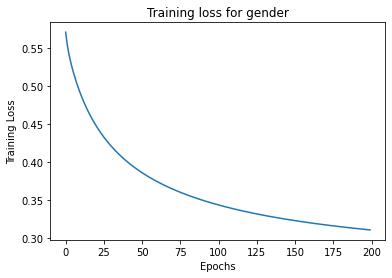

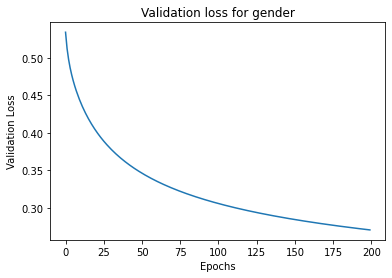

In [22]:
plt.plot(train_costs_gender)
plt.title("Training loss for gender")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()
plt.plot(val_costs_gender)
plt.title("Validation loss for gender")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

thetas=load_pickled_data("/content/train_gender_thetas.data")
preds=h(test_X_gender,thetas)
pred_labels=[np.argmax(i) for i in preds]
ground_truths=[np.argmax(i) for i in test_Y_gender]

print(accuracy_score(ground_truths,pred_labels))
print(classification_report(ground_truths,pred_labels))
print(confusion_matrix(ground_truths,pred_labels))

0.8352941176470589
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       130
           1       0.69      0.55      0.61        40

    accuracy                           0.84       170
   macro avg       0.78      0.74      0.75       170
weighted avg       0.83      0.84      0.83       170

[[120  10]
 [ 18  22]]


PLOTS AND METRICS FOR SPEAKER

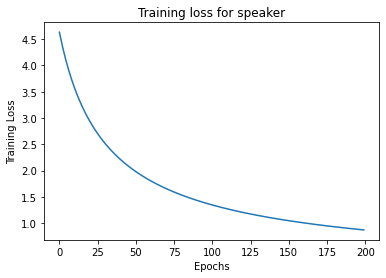

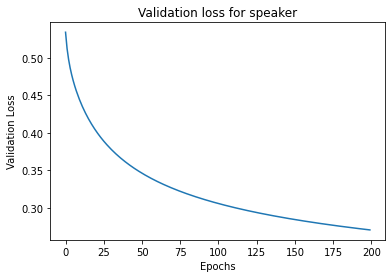

In [23]:
plt.plot(train_costs_speaker)
plt.title("Training loss for speaker")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()
plt.plot(val_costs_gender)
plt.title("Validation loss for speaker")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

thetas=load_pickled_data("/content/train_speaker_thetas.data")
preds=h(test_X_speaker,thetas)
pred_labels=[np.argmax(i) for i in preds]
ground_truths=[np.argmax(i) for i in test_Y_speaker]

print(accuracy_score(ground_truths,pred_labels))
print(classification_report(ground_truths,pred_labels))
print(confusion_matrix(ground_truths,pred_labels))

0.954225352112676
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
         